In [2]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from pprint import pprint

In [3]:
anime = pd.read_csv('assignment_2_anime.csv')
rtrain = pd.read_csv('assignment_2_ratings_train.csv')
rtest = pd.read_csv('assignment_2_ratings_test.csv')

In [34]:
rtest

,user_id,anime_id,rating
0,44017,13161,4
1,14307,14993,7
2,55155,268,9
3,63515,2889,9
4,54059,2581,7
...,...,...,...
1901168,56619,31483,10
1901169,24755,1210,8
1901170,17346,15225,6
1901171,28874,5041,8


In [4]:
# dataset sizes
print(f'anime: {anime.shape}')
print(f'rtrain: {rtrain.shape}')
print(f'rtest: {rtest.shape}')

anime: (12294, 7)
rtrain: (4436068, 3)
rtest: (1901173, 3)


Dataset source: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

> Note the dataset seems to be from 6 years ago!

Context

This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.

Content

Anime.csv

- anime_id - myanimelist.net's unique id identifying an anime.
- name - full name of anime.
- genre - comma separated list of genres for this anime.
- type - movie, TV, OVA, etc.
- episodes - how many episodes in this show. (1 if movie).
- rating - average rating out of 10 for this anime.
- members - number of community members that are in this anime's "group".

Rating.csv

- user_id - non identifiable randomly generated user id.
- anime_id - the anime that this user has rated.
- rating - rating out of 10 this user has assigned.

# Checking for Missing/Duplicate Data

## `anime`

In [5]:
anime['anime_id'].unique().size == anime.shape[0]

True

In [6]:
anime['name'].unique().size == anime.shape[0]

False

In [7]:
anime[anime['name'].duplicated(keep=False)]

,anime_id,name,genre,type,episodes,rating,members
10140,22399,Saru Kani Gassen,Kids,OVA,1,5.23,62
10141,30059,Saru Kani Gassen,Drama,Movie,1,4.75,76
10193,33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12,6.67,114
10194,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110


In [8]:
anime[anime['genre'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607
...,...,...,...,...,...,...,...
11070,32032,Seikaisuru Kado,NaN,NaN,Unknown,NaN,1797
11086,34310,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...,NaN,Movie,1,NaN,51
11097,34474,Tsukipro The Animation,NaN,TV,Unknown,NaN,843
11112,33035,Yuyushiki Special,NaN,Special,1,NaN,2294


In [9]:
anime[anime['type'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,NaN,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,Unknown,NaN,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,Unknown,NaN,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,Unknown,NaN,8666
10949,33475,Busou Shoujo Machiavellianism,"Action, School, Shounen",NaN,Unknown,NaN,1896
10963,31456,Code:Realize: Sousei no Himegimi,"Adventure, Fantasy, Romance, Shoujo",NaN,Unknown,NaN,4017
10983,34332,Flying Babies,NaN,NaN,Unknown,NaN,22
10988,34280,Gamers!,"Comedy, Romance, School",NaN,Unknown,NaN,1045
10990,34485,Ganko-chan,NaN,NaN,Unknown,NaN,11


In [10]:
anime[anime['episodes'].str.isnumeric() == False]

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400
...,...,...,...,...,...,...,...
12265,34361,Kyonyuu Reijou MC Gakuen,Hentai,OVA,Unknown,NaN,205
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [11]:
anime[anime['rating'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
8968,34502,Inazma Delivery,"Action, Comedy, Sci-Fi",TV,10,NaN,32
9657,34309,Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...,"Comedy, Supernatural",TV,Unknown,NaN,129
10896,34096,Gintama (2017),"Action, Comedy, Historical, Parody, Samurai, S...",TV,Unknown,NaN,13383
10897,34134,One Punch Man 2,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,Unknown,NaN,90706
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,79
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [12]:
anime[anime['members'].isnull()]

,anime_id,name,genre,type,episodes,rating,members


In [13]:
anime[['rating', 'members']].describe().round(2)

,rating,members
count,12064.00,12294.00
mean,6.47,18071.34
std,1.03,54820.68
min,1.67,5.00
25%,5.88,225.00
50%,6.57,1550.00
75%,7.18,9437.00
max,10.00,1013917.00


Conclusion for `anime`
1. `anime_id` are all unique
2. `names` may overlap but not important
3. `genre`, `type`, `episodes` and `rating` all have **missing data**.
4. `members` do not have missing data

## rtrain

In [14]:
rtrain.isnull().any()

user_id     False
anime_id    False
rating      False
dtype: bool

In [15]:
rtrain[rtrain.duplicated(subset=['user_id', 'anime_id'], keep=False)].sort_values('anime_id')

,user_id,anime_id,rating
2541017,42653,1575,6
2703774,42653,1575,8
1847608,42653,2001,10
2891686,42653,2001,8
2735639,42653,11757,5
3053323,42653,11757,8
1075209,42653,16498,8
2604873,42653,16498,8
1145451,42653,20507,9
2687251,42653,20507,7


In [28]:
rtest['rating'].unique()

array([ 4,  7,  9,  6, 10,  8,  5,  3,  2,  1])

Conclusion for `rtrain`

no missing data but there are duplicates where the same user rates the same anime twice.

maybe we take the "later" rating according to the csv order? (drop the first)

it's very few so it should be insignificant.

## rtest

In [16]:
pd.concat(
    [rtrain['rating'].describe().round(2), rtest['rating'].describe().round(2)],
    keys=['train', 'test'],
    axis=1
)

,train,test
count,4436068.00,1901173.00
mean,7.81,7.81
std,1.57,1.57
min,1.00,1.00
25%,7.00,7.00
50%,8.00,8.00
75%,9.00,9.00
max,10.00,10.00


In [17]:
rtest.isnull().any()

user_id     False
anime_id    False
rating      False
dtype: bool

In [18]:
rtest[rtest.duplicated(subset=['user_id', 'anime_id'], keep=False)].sort_values('anime_id')

,user_id,anime_id,rating
732651,42653,23283,8
1130040,42653,23283,9


We just have to account for the only duplicate entry in the test set.

# Processing Genre

In [19]:
genres = anime['genre'].dropna().str.split(', ').tolist()
unique_genres = set(itertools.chain(*genres))
len(unique_genres)

43

In [20]:
unique_genres.add('NaN') # add NaN to the set of genres

[('Comedy', 4645),
 ('Action', 2845),
 ('Adventure', 2348),
 ('Fantasy', 2309),
 ('Sci-Fi', 2070)]


<BarContainer object of 44 artists>

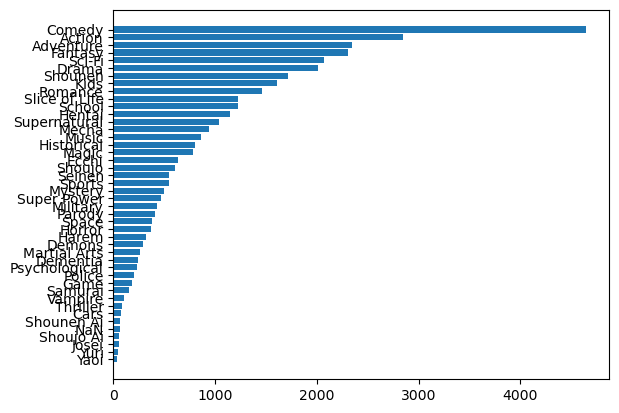

In [21]:
unique_genre_counts = dict.fromkeys(unique_genres, 0)
for genre_list in genres:
    for genre in genre_list:
        unique_genre_counts[genre] += 1
unique_genre_counts['NaN'] += anime['genre'].isnull().sum() # add NaN to the counts

# visualize the counts
sorted_genres = sorted(unique_genre_counts.items(), key=lambda x: x[1])
pprint(sorted_genres[-5:][::-1])
plt.barh(*zip(*sorted_genres))

## Define genre vector

In [22]:
genre_map = sorted(unique_genre_counts, key=lambda x: unique_genre_counts[x], reverse=True)
genre_dim = len(genre_map)

def genre_vector(genre_list: list) -> np.ndarray:
    vector = np.zeros(genre_dim, dtype=np.int8)
    for genre in genre_list:
        vector[genre_map.index(genre)] = 1
    return vector

In [25]:
anime['genre_vector'] = anime['genre'].fillna('NaN').str.split(', ').apply(genre_vector)

# Scraping online

We can use these available data to augment our dataset?

In [26]:
import mal_scraper as ms

In [30]:
ms.get_anime(34502).data

{'name': '\n              Top\n                          ',
 'name_english': 'Inazma Delivery',
 'format': <Format.tv: 'TV'>,
 'episodes': 10,
 'airing_status': <AiringStatus.finished: 'FINISHED'>,
 'airing_started': datetime.date(2016, 12, 9),
 'airing_finished': datetime.date(2017, 2, 10),
 'airing_premiere': (2017, <Season.winter: 'WINTER'>),
 'mal_age_rating': <AgeRating.mal_t: 'TEEN'>,
 'mal_score': 6.3,
 'mal_scored_by': 400,
 'mal_rank': 7838,
 'mal_popularity': 11940,
 'mal_members': 1190,
 'mal_favourites': 2}

In [31]:
anime[anime['anime_id']==34502]

,anime_id,name,genre,type,episodes,rating,members,genre_vector
8968,34502,Inazma Delivery,"Action, Comedy, Sci-Fi",TV,10,NaN,32,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
